In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Importovanie dat

In [93]:
data = pd.read_csv('nyc_squirrel.csv')

In [94]:
print(data.shape)
data.head().T

(3023, 36)


,0,1,2,3,4
long,-73.956134,-73.957044,-73.976831,-73.975725,-73.959313
lat,40.794082,40.794851,40.766718,40.769703,40.797533
unique_squirrel_id,37F-PM-1014-03,37E-PM-1006-03,2E-AM-1010-03,5D-PM-1018-05,39B-AM-1018-01
hectare,37F,37E,02E,05D,39B
shift,PM,PM,AM,PM,AM
date,10142018,10062018,10102018,10182018,10182018
hectare_squirrel_number,3,3,3,5,1
age,NaN,Adult,Adult,Juvenile,NaN
primary_fur_color,NaN,Gray,Cinnamon,Gray,NaN
highlight_fur_color,NaN,Cinnamon,NaN,NaN,NaN


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   long                                        3023 non-null   float64
 1   lat                                         3023 non-null   float64
 2   unique_squirrel_id                          3023 non-null   object 
 3   hectare                                     3023 non-null   object 
 4   shift                                       3023 non-null   object 
 5   date                                        3023 non-null   int64  
 6   hectare_squirrel_number                     3023 non-null   int64  
 7   age                                         2902 non-null   object 
 8   primary_fur_color                           2968 non-null   object 
 9   highlight_fur_color                         1937 non-null   object 
 10  combination_

In [96]:
df = data[['long','lat','unique_squirrel_id','shift','date','age','primary_fur_color','highlight_fur_color','location','above_ground_sighter_measurement']]

In [97]:
df['date'] = pd.to_datetime(data['date'],format="%m%d%Y")

<ipython-input-97-52ff0c1e54dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(data['date'],format="%m%d%Y")


In [98]:
df['above_ground_sighter_measurement'] = df['above_ground_sighter_measurement'].replace("FALSE",np.nan).astype('float')

<ipython-input-98-6127f34891a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['above_ground_sighter_measurement'] = df['above_ground_sighter_measurement'].replace("FALSE",np.nan).astype('float')


In [99]:
df['did_activity'] = np.any(data[['running','chasing','climbing','eating','foraging']],axis=1)
df['did_interaction'] = np.any(data[['kuks','quaas','moans','tail_flags','tail_twitches','approaches','runs_from']],axis=1)

<ipython-input-99-1f7b25244f03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['did_activity'] = np.any(data[['running','chasing','climbing','eating','foraging']],axis=1)
<ipython-input-99-1f7b25244f03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['did_interaction'] = np.any(data[['kuks','quaas','moans','tail_flags','tail_twitches','approaches','runs_from']],axis=1)


# EDA 

In [100]:
df['unique_squirrel_id'].value_counts().head(6)

37E-PM-1006-03    2
40B-AM-1019-06    2
1F-AM-1010-04     2
4C-PM-1010-05     2
7D-PM-1010-01     2
17E-AM-1017-08    1
Name: unique_squirrel_id, dtype: int64

In [101]:
df['above_ground_sighter_measurement'].describe()

count    793.000000
mean      15.210593
std       15.502925
min        0.000000
25%        5.000000
50%       10.000000
75%       20.000000
max      180.000000
Name: above_ground_sighter_measurement, dtype: float64

In [102]:
l=['shift','age','primary_fur_color','highlight_fur_color','location','above_ground_sighter_measurement','did_activity','did_interaction']

In [103]:
df['age'].value_counts()

Adult       2568
Juvenile     330
?              4
Name: age, dtype: int64

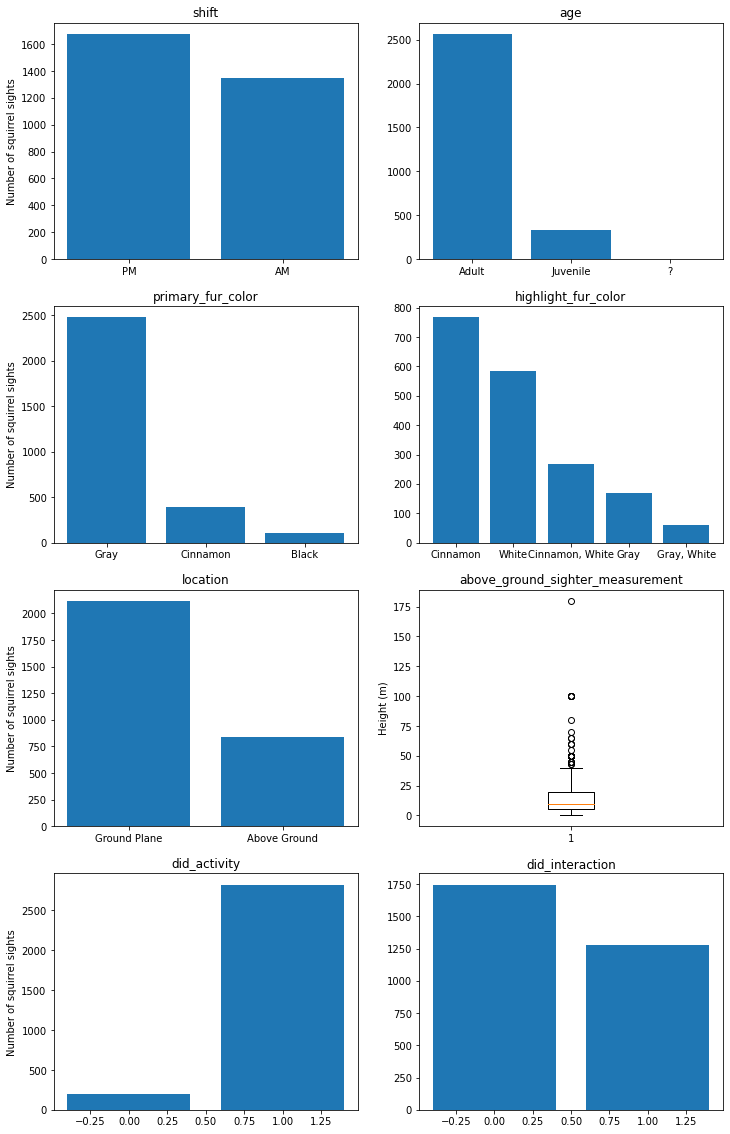

In [104]:
fig,ax = plt.subplots(4,2,figsize=(6*2,5*4))
for i in range(4):
    for j in range(2):
        ax[i,j].set_title(l[i*2+j])
        if l[i*2+j] == 'above_ground_sighter_measurement':
            ax[i,j].boxplot(df[l[i*2+j]].dropna())
            ax[i,j].set_ylabel('Height (m)')
        else:
            ax[i,j].bar(df[l[i*2+j]].value_counts().head().index,df[l[i*2+j]].value_counts().head())
        if(j == 0):
            ax[i,j].set_ylabel('Number of squirrel sights')
plt.show()

## Zaver
* 5 vevericiek bolo patrenych viac krat
* vacsina spatreni sa stalo po obede
* cca 11% vevericiek bolo dospievajucich
* najdominantejsia farba je seda 
* vevericky su spatrene vacsinou na zemi 
* ked uz su nad zemou tak interkvartalne rozpatie je medzi 5 az 20 metrov
* smerodajna odchilka a boxplot naznacuje existenciu outlierov
* viac ako 90% vevericiek robila nejaku aktivitu
* viac vevericiek neinteragovalo s clovekom

# Casovy rad

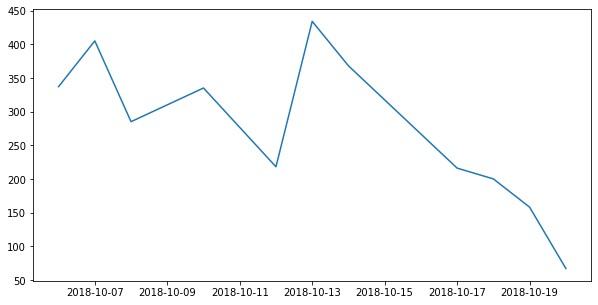

In [106]:
plt.figure(figsize=(10,5))
plt.plot(df.groupby('date')['long'].count())